# Data Wrangling

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
interest = pd.read_csv('interest.csv')
difficulty = pd.read_csv('difficulty.csv')

In [14]:
# Exploratory Analysis
print(interest.head())
print(interest.info())
print(interest.describe())
print(interest['id'].unique().shape)

# 'nlp.interest' and 'neural.interest' each have one missing value
# Confirmed that all values in 'id' are distinct

   id  prediction.interest  nlp.interest  sna.interest  neural.interest  \
0  s1                    5           5.0             4              5.0   
1  s2                    5           5.0             5              5.0   
2  s3                    5           5.0             5              5.0   
3  s4                    4           5.0             5              5.0   
4  s5                    4           4.0             4              5.0   

   viz.interest  loop.interest  sql.interest  
0             2            4.0           5.0  
1             5            5.0           5.0  
2             5            4.0           4.0  
3             5            5.0           5.0  
4             4            4.0           5.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   52 non-null     object 
 1   prediction

In [15]:
# Exploratory Analysis
print(difficulty.head())
print(difficulty.info())
print(difficulty.describe())
print(difficulty['id'].unique().shape)

# 'nlp.difficulty', 'neural.difficulty', 'vlz.difficulty', 'loop.difficulty', 'sql.difficulty', 
# each have 1-3 missing values
# Confirmed that all 'id's are distinct

   id  prediction.difficulty  nlp.difficulty  sna.difficulty  \
0  s1                      4             5.0               3   
1  s2                      5             5.0               5   
2  s3                      3             3.0               3   
3  s4                      3             4.0               4   
4  s5                      4             4.0               4   

   neural.difficulty  viz.difficulty  loop.difficulty  sql.difficulty  
0                5.0             3.0              3.0             5.0  
1                5.0             5.0              5.0             5.0  
2                3.0             3.0              3.0             2.0  
3                4.0             4.0              5.0             3.0  
4                5.0             4.0              4.0             4.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 -

In [16]:
# Create a dataset w/ the rows as the seven units ('prediction'-'sql') and interest and difficulty as the columns
interest_means = interest.iloc[:, 1:].mean()
difficulty_means = difficulty.iloc[:, 1:].mean()
interest_means = interest_means.rename(lambda x: x.replace('.interest', ''))
difficulty_means = difficulty_means.rename(lambda x: x.replace('.difficulty', ''))
difficulty_interest = pd.concat([difficulty_means, interest_means], axis = 1)
difficulty_interest = difficulty_interest.rename(columns = {0 : 'difficulty', 1 : 'interest'})
print(difficulty_interest)

            difficulty  interest
prediction    3.807692  4.326923
nlp           4.220000  4.431373
sna           3.769231  4.134615
neural        4.400000  4.490196
viz           4.060000  4.596154
loop          4.080000  4.431373
sql           3.693878  4.431373


# Create a Content-Based Recommender

A content-based recommender suggests similar items based on other variables.  
In this sense, it is very much similar to distance-bsed algorithms (e.g KNN).

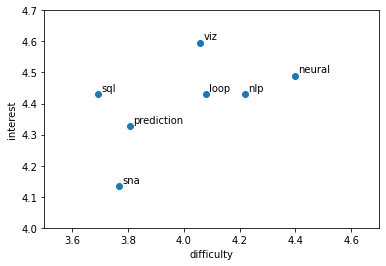

In [18]:
# Create a basic scatterplot
plt.scatter(difficulty_interest.difficulty, 
            difficulty_interest.interest)
plt.xlabel('difficulty')
plt.ylabel('interest')
plt.xlim(3.5, 4.7)
plt.ylim(4.0, 4.7)
for i, index in enumerate(difficulty_interest.index):
    plt.text(difficulty_interest.difficulty[i] + 0.01, 
             difficulty_interest.interest[i] + 0.01,
             index)

In [19]:
# Create a dataframe with a new column 'distance'.
# Assign 0s to 'distance' temporarily
difficulty_interest_distance = difficulty_interest.copy()
difficulty_interest_distance['distance'] = 0

# Select random row to start
item = difficulty_interest_distance.loc['prediction', ]

for i in difficulty_interest.index:
    target = difficulty_interest_distance.loc[i, ]
    d = math.dist(item, target)
    difficulty_interest_distance.loc[i, 'distance'] = d
    
difficulty_interest_distance.sort_values('distance', ascending = True)

,difficulty,interest,distance
prediction,3.807692,4.326923,0.000000
sql,3.693878,4.431373,0.154478
sna,3.769231,4.134615,0.196116
loop,4.080000,4.431373,0.291652
viz,4.060000,4.596154,0.368977
nlp,4.220000,4.431373,0.425332
neural,4.400000,4.490196,0.614399


We will now create a recommender system using the *cosine similarity* to measure the distance

In [20]:
cosine_sim = cosine_similarity(difficulty_interest)
cosine_sim

# Note: We have created a 7*7 array, representing the cosine similarity 
# between the seven units.
# The maximum value is 1 (representing complete similarity)

array([[1.        , 0.99922723, 0.99984605, 0.99856397, 0.99999823,
        0.99974724, 0.99964159],
       [0.99922723, 1.        , 0.99976308, 0.99989801, 0.99929948,
        0.99985835, 0.99781682],
       [0.99984605, 0.99976308, 1.        , 0.99935025, 0.99987732,
        0.99998782, 0.99901794],
       [0.99856397, 0.99989801, 0.99935025, 1.        , 0.99866309,
        0.999516  , 0.99677186],
       [0.99999823, 0.99929948, 0.99987732, 0.99866309, 1.        ,
        0.99978781, 0.99958939],
       [0.99974724, 0.99985835, 0.99998782, 0.999516  , 0.99978781,
        1.        , 0.99878705],
       [0.99964159, 0.99781682, 0.99901794, 0.99677186, 0.99958939,
        0.99878705, 1.        ]])

In [21]:
module_indices = pd.Series(range(len(difficulty_interest.index)), 
                           index = difficulty_interest.index)
module_indices

prediction    0
nlp           1
sna           2
neural        3
viz           4
loop          5
sql           6
dtype: int64

In [22]:
def get_recommendations (name, cosine_sim, matrix_indices):
    idx = matrix_indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:15]
    rank_indices = [i[0] for i in sim_scores]
    return matrix_indices.iloc[rank_indices]
    
get_recommendations('prediction', cosine_sim, module_indices)

viz       4
sna       2
loop      5
sql       6
nlp       1
neural    3
dtype: int64

# Collaborative Filter

Collaborative filter relies on the dynamic input of the user data to make recommendations.  
There are two types of collaborative filters:  
1. *Item-based filtering*: Similar to the previous content recommendation engine. The list is constantly updated based on user input.  
2. *User-based filtering*: CT recommends items based on similar users. In other words, the filter initially connects users based on their input, and assumes similar people will continue to have similar preferences.  


We will now create a user-bsaed filter.

In [23]:
# Clean dataset
interest_na = interest.dropna()
interest_na.index = interest_na.id
interest_clean = interest_na.drop('id', axis = 1)

In [24]:
# Obtain the cosine similarity matrix
cosine_sim_interest = cosine_similarity(interest_clean, interest_clean)
# Create an index for the student list
id_indices = pd.Series(range(len(interest_clean.index)), 
                       index = interest_clean.index)

get_recommendations('s7', cosine_sim_interest, id_indices)

id_indices

id
s1      0
s2      1
s3      2
s4      3
s5      4
s6      5
s7      6
s8      7
s9      8
s10     9
s11    10
s12    11
s13    12
s14    13
s15    14
s16    15
s17    16
s18    17
s19    18
s20    19
s21    20
s22    21
s23    22
s24    23
s25    24
s26    25
s27    26
s28    27
s29    28
s30    29
s31    30
s32    31
s33    32
s34    33
s35    34
s36    35
s37    36
s38    37
s39    38
s40    39
s41    40
s42    41
s43    42
s44    43
s45    44
s46    45
s47    46
s48    47
s51    48
s52    49
dtype: int64